# Customized emails

In this lesson, you will generate customer service emails that are tailored to each customer's review.

## Setup

In [3]:
from openai import OpenAI
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')

In [4]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=OPENAI_API_KEY,
)

def get_completion(prompt, model="gpt-3.5-turbo", temperature=0): 
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    return response.choices[0].message.content

## Customize the automated reply to a customer email

In [5]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [6]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Dear valued customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about the issues you experienced with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance.

We appreciate your feedback as it helps us improve our products and services for all our customers.

Thank you again for your review.

AI customer agent


## Change temperature to get a different reply

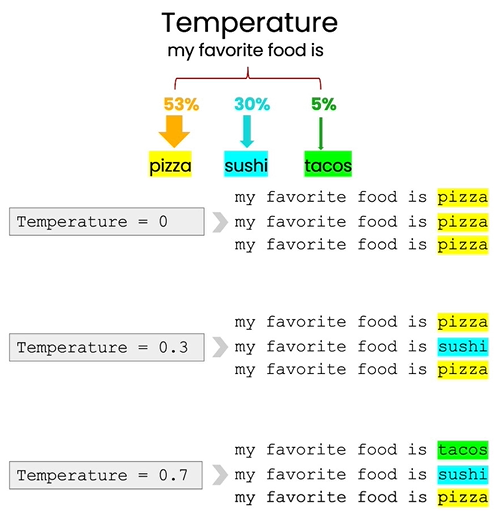

In [8]:
from PIL import Image
im = Image.open("Temperature.png")
display(im)

In [11]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Dear valued customer,

Thank you for taking the time to share your detailed feedback with us. We sincerely apologize for any inconvenience you experienced with the price increase and the quality of the product. We strive to provide the best products and service to our customers, and your feedback is crucial in helping us improve.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team. They will be more than happy to assist you.

Thank you for your understanding and for being a loyal customer. We appreciate your feedback and will take it into consideration for future improvements.

AI customer agent


# Exercise
 - Complete the prompts similar to what we did in class. 
     - Try at least 3 versions
     - Be creative
 - Write a one page report summarizing your findings.
     - Were there variations that didn't work well? i.e., where GPT either hallucinated or wrong
 - What did you learn?

## Trying different temperature settings and compare the results

In [15]:
from redlines import Redlines
from IPython.display import display, Markdown

temperatures = (t * 0.1 for t in range(0, 11))
preview = ""
for temparature in temperatures:
    response = get_completion(prompt, temperature=temparature)
    print(f"Temperature: {temparature}")
    print(response)
    print("\n")
    if preview != "":
        print("Difference:")
        diff = Redlines(preview,response)
        display(Markdown(diff.output_markdown))
    preview = response


Temperature: 0.0
Dear Valued Customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the pricing changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance.

Thank you for your loyalty and for choosing our products. We appreciate your feedback as it helps us improve our products and services.

AI customer agent


Temperature: 0.1
Dear Valued Customer,

Thank you for taking the time to share your feedback with us. We are sorry to hear about your experience with the price changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer serv

Dear Valued Customer, 

Thank you for taking the time to share your <span style='color:red;font-weight:700;text-decoration:line-through;'>detailed </span>feedback with us. We are sorry to hear about your experience with the <span style='color:red;font-weight:700;text-decoration:line-through;'>pricing </span><span style='color:green;font-weight:700;'>price </span>changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you. 

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team for assistance. </span><span style='color:green;font-weight:700;'>team. They will be more than happy to assist you. </span>

Thank you <span style='color:green;font-weight:700;'>again </span>for your <span style='color:red;font-weight:700;text-decoration:line-through;'>loyalty </span><span style='color:green;font-weight:700;'>review </span>and for <span style='color:red;font-weight:700;text-decoration:line-through;'>choosing our products. </span><span style='color:green;font-weight:700;'>being a loyal customer. </span>We appreciate your feedback as it helps us improve our products and services. 

AI customer agent

Temperature: 0.2
Dear valued customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the pricing changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance.

We appreciate your loyalty and feedback as it helps us improve our products and services.

Thank you again for your review.

AI customer agent


Difference:


Dear <span style='color:red;font-weight:700;text-decoration:line-through;'>Valued Customer, </span><span style='color:green;font-weight:700;'>valued customer, </span>

Thank you for taking the time to share your <span style='color:green;font-weight:700;'>detailed </span>feedback with us. We are sorry to hear about your experience with the <span style='color:red;font-weight:700;text-decoration:line-through;'>price </span><span style='color:green;font-weight:700;'>pricing </span>changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you. 

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team. They will be more than happy to assist you. </span><span style='color:green;font-weight:700;'>team for assistance. </span>

<span style='color:red;font-weight:700;text-decoration:line-through;'>Thank you again for your review and for being a loyal customer. </span>We appreciate your <span style='color:green;font-weight:700;'>loyalty and </span>feedback as it helps us improve our products and services. 

<span style='color:green;font-weight:700;'>Thank you again for your review. </span>

<span style='color:green;font-weight:700;'></span>AI customer agent

Temperature: 0.30000000000000004
Dear valued customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the price changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance. We are here to help address any issues you may have encountered.

Thank you again for your review and for choosing our products. We appreciate your feedback as it helps us improve our products and services.

AI customer agent


Difference:


Dear valued customer, 

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the <span style='color:red;font-weight:700;text-decoration:line-through;'>pricing </span><span style='color:green;font-weight:700;'>price </span>changes and the decrease in quality of the product. We apologize for any inconvenience this may have caused you. 

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance. <span style='color:green;font-weight:700;'>We are here to help address any issues you may have encountered. </span>

<span style='color:green;font-weight:700;'>Thank you again for your review and for choosing our products. </span>We appreciate your <span style='color:red;font-weight:700;text-decoration:line-through;'>loyalty and </span>feedback as it helps us improve our products and services. 

<span style='color:red;font-weight:700;text-decoration:line-through;'>Thank you again for your review. ¶ </span>AI customer agent

Temperature: 0.4
Dear valued customer,

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team. They will be more than happy to assist you.

We appreciate your loyalty and feedback as it helps us improve our products and services.

Thank you once again for your review.

AI customer agent


Difference:


Dear valued customer, 

Thank you for taking the time to share your detailed feedback with us. We are sorry to hear about your experience with the <span style='color:red;font-weight:700;text-decoration:line-through;'>price </span><span style='color:green;font-weight:700;'>pricing </span>changes and the <span style='color:red;font-weight:700;text-decoration:line-through;'>decrease in </span>quality of the product. We apologize for any inconvenience this may have caused you. 

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team for assistance. We are here </span><span style='color:green;font-weight:700;'>team. They will be more than happy </span>to <span style='color:red;font-weight:700;text-decoration:line-through;'>help address any issues you may have encountered. </span><span style='color:green;font-weight:700;'>assist you. </span>

<span style='color:red;font-weight:700;text-decoration:line-through;'>Thank you again for your review and for choosing our products. </span>We appreciate your <span style='color:green;font-weight:700;'>loyalty and </span>feedback as it helps us improve our products and services. 

<span style='color:green;font-weight:700;'>Thank you once again for your review. </span>

<span style='color:green;font-weight:700;'></span>AI customer agent

Temperature: 0.5
Dear valued customer,

Thank you for taking the time to share your feedback with us. We are truly sorry to hear about the issues you experienced with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance. We are here to help address any issues you may have.

We appreciate your loyalty and feedback as it helps us to improve our products and services for all our customers.

Thank you again for your review.

AI customer agent


Difference:


Dear valued customer, 

Thank you for taking the time to share your <span style='color:red;font-weight:700;text-decoration:line-through;'>detailed </span>feedback with us. We are <span style='color:green;font-weight:700;'>truly </span>sorry to hear about <span style='color:red;font-weight:700;text-decoration:line-through;'>your experience </span><span style='color:green;font-weight:700;'>the issues you experienced </span>with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you. 

If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team. They will be more than happy </span><span style='color:green;font-weight:700;'>team for assistance. We are here </span>to <span style='color:red;font-weight:700;text-decoration:line-through;'>assist you. </span><span style='color:green;font-weight:700;'>help address any issues you may have. </span>

We appreciate your loyalty and feedback as it helps us <span style='color:green;font-weight:700;'>to </span>improve our products and <span style='color:red;font-weight:700;text-decoration:line-through;'>services. </span><span style='color:green;font-weight:700;'>services for all our customers. </span>

Thank you <span style='color:red;font-weight:700;text-decoration:line-through;'>once </span>again for your review. 

AI customer agent

Temperature: 0.6000000000000001
Dear Valued Customer,

Thank you for taking the time to share your detailed feedback with us. We are truly sorry to hear about the issues you experienced with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you.

If you have any further concerns or if you would like to discuss this matter further, please do not hesitate to reach out to our customer service team. They will be more than happy to assist you.

We appreciate your loyalty and feedback as it helps us to improve our products and services for all our customers.

Thank you again for your review.

AI customer agent


Difference:


Dear <span style='color:red;font-weight:700;text-decoration:line-through;'>valued customer, </span><span style='color:green;font-weight:700;'>Valued Customer, </span>

Thank you for taking the time to share your <span style='color:green;font-weight:700;'>detailed </span>feedback with us. We are truly sorry to hear about the issues you experienced with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you. 

If you have any further concerns or <span style='color:green;font-weight:700;'>if you </span>would like to discuss this matter further, please <span style='color:red;font-weight:700;text-decoration:line-through;'>feel free </span><span style='color:green;font-weight:700;'>do not hesitate </span>to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team for assistance. We are here </span><span style='color:green;font-weight:700;'>team. They will be more than happy </span>to <span style='color:red;font-weight:700;text-decoration:line-through;'>help address any issues you may have. </span><span style='color:green;font-weight:700;'>assist you. </span>

We appreciate your loyalty and feedback as it helps us to improve our products and services for all our customers. 

Thank you again for your review. 

AI customer agent

Temperature: 0.7000000000000001
Dear valued customer,

Thank you for taking the time to share your feedback with us. We are truly sorry to hear about the issues you experienced with our product and the price fluctuations you noticed. We apologize for any inconvenience this may have caused you.

We strive to provide high-quality products and excellent customer service, and we regret that we fell short of your expectations this time. If you have any further concerns or would like to discuss this matter further, please feel free to reach out to our customer service team for assistance.

We appreciate your loyalty and feedback as it helps us improve our products and services for all our customers. Thank you for choosing us and for sharing your experience.

AI customer agent


Difference:


Dear <span style='color:red;font-weight:700;text-decoration:line-through;'>Valued Customer, </span><span style='color:green;font-weight:700;'>valued customer, </span>

Thank you for taking the time to share your <span style='color:red;font-weight:700;text-decoration:line-through;'>detailed </span>feedback with us. We are truly sorry to hear about the issues you experienced with <span style='color:red;font-weight:700;text-decoration:line-through;'>the pricing changes </span><span style='color:green;font-weight:700;'>our product </span>and the <span style='color:red;font-weight:700;text-decoration:line-through;'>quality of the product. </span><span style='color:green;font-weight:700;'>price fluctuations you noticed. </span>We apologize for any inconvenience this may have caused you. 

<span style='color:green;font-weight:700;'>We strive to provide high-quality products and excellent customer service, and we regret that we fell short of your expectations this time. </span>If you have any further concerns or <span style='color:red;font-weight:700;text-decoration:line-through;'>if you </span>would like to discuss this matter further, please <span style='color:red;font-weight:700;text-decoration:line-through;'>do not hesitate </span><span style='color:green;font-weight:700;'>feel free </span>to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team. They will be more than happy to assist you. </span><span style='color:green;font-weight:700;'>team for assistance. </span>

We appreciate your loyalty and feedback as it helps us <span style='color:red;font-weight:700;text-decoration:line-through;'>to </span>improve our products and services for all our customers. <span style='color:red;font-weight:700;text-decoration:line-through;'>¶ </span>Thank you <span style='color:red;font-weight:700;text-decoration:line-through;'>again </span>for <span style='color:green;font-weight:700;'>choosing us and for sharing </span>your <span style='color:red;font-weight:700;text-decoration:line-through;'>review. </span><span style='color:green;font-weight:700;'>experience. </span>

AI customer agent

Temperature: 0.8
Dear Valued Customer,

Thank you for taking the time to share your feedback with us. We sincerely apologize for any inconvenience you experienced with our product. Your comments are valuable to us, and we will certainly take them into consideration for future improvements.

If you have any further concerns or would like to discuss this matter further, please do not hesitate to reach out to our customer service team. They will be more than happy to assist you.

Once again, thank you for your review and for choosing our products.

AI customer agent


Difference:


Dear <span style='color:red;font-weight:700;text-decoration:line-through;'>valued customer, </span><span style='color:green;font-weight:700;'>Valued Customer, </span>

Thank you for taking the time to share your feedback with us. We <span style='color:red;font-weight:700;text-decoration:line-through;'>are truly sorry to hear about the issues </span><span style='color:green;font-weight:700;'>sincerely apologize for any inconvenience </span>you experienced with our <span style='color:red;font-weight:700;text-decoration:line-through;'>product and the price fluctuations you noticed. We apologize for any inconvenience this may have caused you. ¶ We strive </span><span style='color:green;font-weight:700;'>product. Your comments are valuable </span>to <span style='color:red;font-weight:700;text-decoration:line-through;'>provide high-quality products and excellent customer service, </span><span style='color:green;font-weight:700;'>us, </span>and we <span style='color:red;font-weight:700;text-decoration:line-through;'>regret that we fell short of your expectations this time. </span><span style='color:green;font-weight:700;'>will certainly take them into consideration for future improvements. </span>

<span style='color:green;font-weight:700;'></span>If you have any further concerns or would like to discuss this matter further, please <span style='color:red;font-weight:700;text-decoration:line-through;'>feel free </span><span style='color:green;font-weight:700;'>do not hesitate </span>to reach out to our customer service <span style='color:red;font-weight:700;text-decoration:line-through;'>team for assistance. </span><span style='color:green;font-weight:700;'>team. They will be more than happy to assist you. </span>

<span style='color:red;font-weight:700;text-decoration:line-through;'>We appreciate your loyalty and feedback as it helps us improve our products and services for all our customers. Thank </span><span style='color:green;font-weight:700;'>Once again, thank </span>you for <span style='color:red;font-weight:700;text-decoration:line-through;'>choosing us </span><span style='color:green;font-weight:700;'>your review </span>and for <span style='color:red;font-weight:700;text-decoration:line-through;'>sharing your experience. </span><span style='color:green;font-weight:700;'>choosing our products. </span>

AI customer agent

Temperature: 0.9
Dear Valued Customer,

Thank you for taking the time to share your detailed feedback with us. We sincerely apologize for any inconvenience you experienced with the pricing changes and the decrease in quality of our product. We strive to provide the best products and service to our customers, and it is disappointing to hear that we fell short in this instance.

If you have any further concerns or would like to discuss this matter further, please do not hesitate to reach out to our customer service team. They will be more than happy to assist you.

Thank you once again for your valuable feedback. We appreciate your loyalty and will work hard to improve in the areas you have highlighted.

Warm regards,
AI Customer Agent


Difference:


Dear Valued Customer, 

Thank you for taking the time to share your <span style='color:green;font-weight:700;'>detailed </span>feedback with us. We sincerely apologize for any inconvenience you experienced with <span style='color:green;font-weight:700;'>the pricing changes and the decrease in quality of </span>our product. <span style='color:red;font-weight:700;text-decoration:line-through;'>Your comments are valuable </span><span style='color:green;font-weight:700;'>We strive </span>to <span style='color:red;font-weight:700;text-decoration:line-through;'>us, </span><span style='color:green;font-weight:700;'>provide the best products </span>and <span style='color:green;font-weight:700;'>service to our customers, and it is disappointing to hear that </span>we <span style='color:red;font-weight:700;text-decoration:line-through;'>will certainly take them into consideration for future improvements. </span><span style='color:green;font-weight:700;'>fell short in this instance. </span>

If you have any further concerns or would like to discuss this matter further, please do not hesitate to reach out to our customer service team. They will be more than happy to assist you. 

<span style='color:red;font-weight:700;text-decoration:line-through;'>Once again, thank </span><span style='color:green;font-weight:700;'>Thank </span>you <span style='color:green;font-weight:700;'>once again </span>for your <span style='color:red;font-weight:700;text-decoration:line-through;'>review </span><span style='color:green;font-weight:700;'>valuable feedback. We appreciate your loyalty </span>and <span style='color:red;font-weight:700;text-decoration:line-through;'>for choosing our products. </span><span style='color:green;font-weight:700;'>will work hard to improve in the areas you have highlighted. </span>

<span style='color:green;font-weight:700;'>Warm regards, </span>

AI <span style='color:red;font-weight:700;text-decoration:line-through;'>customer agent</span><span style='color:green;font-weight:700;'>Customer Agent</span>